In [445]:
import tensorflow as tf
import numpy as np

# **DATA PREPROCESSING**
1. Data reading
2. Data augmentation
3. Dataset splitting

In [446]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [447]:
"""train_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = ImageDataGenerator(
    rescale=1.0 / 255
)"""

'train_gen = ImageDataGenerator(\n        rescale=1./255,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True)\n\ntest_gen = ImageDataGenerator(\n    rescale=1.0 / 255\n)'

In [448]:
ds_train = image_dataset_from_directory('train', batch_size=64)
ds_test = image_dataset_from_directory(
    'test',
)

Found 614 files belonging to 2 classes.
Found 612 files belonging to 2 classes.


In [449]:
type(ds_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [450]:
def resize_rescale(im, lbl):
    return tf.image.resize(im, (224, 224)) / 255.0, lbl

In [451]:
ds_train = ds_train.map(resize_rescale)
ds_test = ds_test.map(resize_rescale)

In [452]:
import matplotlib.pyplot as plt

In [453]:
def visualize_diff(image, augmented_img):
  plt.subplot(1, 2, 1)
  plt.title('Original Image: ')
  plt.imshow(image);

  plt.subplot(1, 2, 2)
  plt.title('Augmented Image: ')
  plt.imshow(augmented_img);

In [454]:
img_ = list(ds_train.take(1))[0][0][0]
augmented_img = tf.image.rot90(img_)

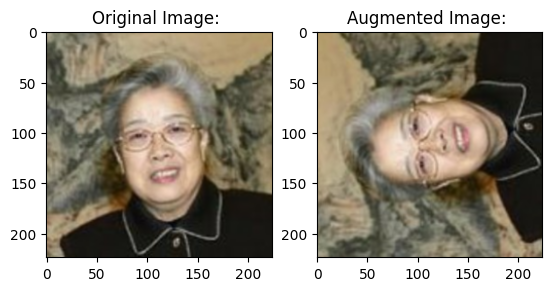

In [455]:
visualize_diff(img_, augmented_img)

tf.Tensor(0, shape=(), dtype=int32)


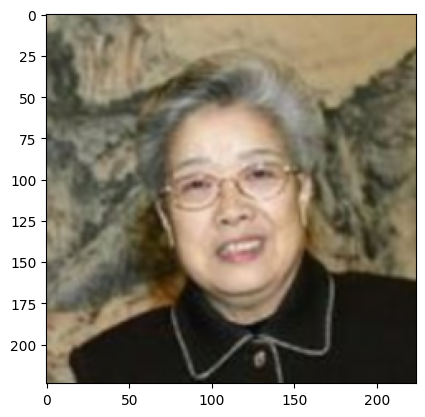

In [456]:
for img, lbl in ds_train.take(1):
    print(lbl[0])
    plt.imshow(img[0])
    break

In [457]:
# 1 - santa
# 0 - not santa

In [458]:
from tensorflow.keras import layers

In [459]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(224, 224, 3)),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.5, 0.2)
])

In [460]:
model = tf.keras.Sequential([
  data_augmentation,
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(15, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),

  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(2, activation='sigmoid'),
])

In [461]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [462]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='weights',
                                                 save_weights_only=True,
                                                 verbose=1)

In [463]:
hist = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=25,
    verbose=2,
    shuffle=True,
    callbacks=[cp_callback]
)

Epoch 1/25



Epoch 1: saving model to weights
10/10 - 8s - loss: 1.2622 - accuracy: 0.5049 - val_loss: 0.6913 - val_accuracy: 0.5212 - 8s/epoch - 786ms/step
Epoch 2/25

Epoch 2: saving model to weights
10/10 - 6s - loss: 0.7257 - accuracy: 0.5033 - val_loss: 0.6893 - val_accuracy: 0.6422 - 6s/epoch - 649ms/step
Epoch 3/25

Epoch 3: saving model to weights
10/10 - 7s - loss: 0.6759 - accuracy: 0.5098 - val_loss: 0.6881 - val_accuracy: 0.5801 - 7s/epoch - 652ms/step
Epoch 4/25

Epoch 4: saving model to weights
10/10 - 6s - loss: 0.6470 - accuracy: 0.5912 - val_loss: 0.6991 - val_accuracy: 0.5131 - 6s/epoch - 643ms/step
Epoch 5/25

Epoch 5: saving model to weights
10/10 - 7s - loss: 0.5408 - accuracy: 0.7508 - val_loss: 0.6761 - val_accuracy: 0.5833 - 7s/epoch - 675ms/step
Epoch 6/25

Epoch 6: saving model to weights
10/10 - 7s - loss: 0.4599 - accuracy: 0.7915 - val_loss: 0.7663 - val_accuracy: 0.5703 - 7s/epoch - 656ms/step
Epoch 7/25

Epoch 7: saving model to weights
10/10 - 6s - loss: 0.4129 - ac

In [474]:
from pathlib import Path
import imghdr

data_dir = "test"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [475]:
model.evaluate(ds_test)

20/20 [==============================] - 2s 52ms/step - loss: 0.5050 - accuracy: 0.8284


[0.5049827694892883, 0.8284313678741455]

In [476]:
y_pred = model.predict(ds_test)

20/20 [==============================] - 2s 53ms/step


In [477]:
# FINALLY, MODEL WORKS WELL !!!!

In [478]:
def create_model():
    model = tf.keras.Sequential([
        data_augmentation,
        layers.Conv2D(10, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Conv2D(15, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Conv2D(30, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),

        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(2, activation='sigmoid'),
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics='accuracy'
    )

    return model

In [479]:
model = create_model()

In [480]:
model.evaluate(ds_test)

20/20 [==============================] - 2s 53ms/step - loss: 0.7100 - accuracy: 0.4722


[0.7099581360816956, 0.4722222089767456]

In [481]:
model.load_weights('weights')

In [482]:
model.evaluate(ds_test)

20/20 [==============================] - 2s 53ms/step - loss: 0.5050 - accuracy: 0.8284


[0.5049827694892883, 0.8284313678741455]

In [483]:
# Now we don't need to fit our model!!!
# And I can start creating a app!!!
# Next level